In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import time
import numpy as np

In [2]:
from Hueristic_methods.Heuristic_Method import hueristic_Method 

In [3]:
# Load the dataset
train_file_path = "./datasets/Train_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
train_data = pd.read_csv(train_file_path)

eval_file_path = "./datasets/Eval_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
eval_data = pd.read_csv(eval_file_path)


In [4]:
#Define levels
levels=5

# Parse relevant columns for all bid and ask levels
bid_columns = [f"bids[{i}].price" for i in range(levels)] + [f"bids[{i}].amount" for i in range(levels)]
ask_columns = [f"asks[{i}].price" for i in range(levels)] + [f"asks[{i}].amount" for i in range(levels)]
feature_columns = bid_columns  + ask_columns + ['mark_price']
eval_columns=['mark_price','next_mark_price','Price Movement',"actual_direction"]

# Features and target
X_train = train_data[feature_columns]
y_train = train_data['next_mark_price']
# X_test = test_data[feature_columns]
# y_test = test_data["target"]
X_eval = eval_data[feature_columns]
y_eval = eval_data[eval_columns]

In [5]:
Heuristic_Method=hueristic_Method(X_train,X_eval,levels)

In [6]:
# Predict 
# Measure the execution time of the function
start_time = time.time()
Heuristic_Predict_data=Heuristic_Method.predict()
end_time = time.time()
execution_time = (end_time - start_time)* 1000 
print(f"Execution_time(Heuristic_Method): {execution_time:.2f} milliseconds")

Execution_time(Heuristic_Method): 3812.11 milliseconds


In [7]:
# combine data tgt
Evaluate_result=pd.concat([y_eval, Heuristic_Predict_data], axis=1)

In [8]:
# Evaluate performance (Mean Squared Error) based on mark price
mse = mean_squared_error(Evaluate_result["next_mark_price"], Evaluate_result["predicted_heuristic"])
print(f"Heuristic Methods MSE (Eval Set): {mse:.2f}")


Heuristic Methods MSE (Eval Set): 2031416.51


In [9]:
# Calculate directional accuracy
# Evaluate_result.loc[:, "predicted_direction_heuristic"] = np.sign(Evaluate_result["predicted_heuristic"] - Evaluate_result["next_mark_price"])
directional_accuracy_heuristic = (Evaluate_result["actual_direction"] == Evaluate_result["predicted_direction_heuristic"]).mean()
print(f"Directional Accuracy (heuristic): {directional_accuracy_heuristic:.2%}")

Directional Accuracy (heuristic): 36.41%


In [10]:
# Tolerance-Based Accuracy
tolerance = 0.0001 * Evaluate_result["next_mark_price"].mean()  # Set tolerance to 0.01% of average price
Evaluate_result.loc[:, "tolerance_heuristic"] = abs(Evaluate_result["predicted_heuristic"] - Evaluate_result["next_mark_price"]) <= tolerance

# Calculate tolerance-based accuracy
tolerance_accuracy_heuristic = Evaluate_result["tolerance_heuristic"].mean()
print(f"Tolerance-Based Accuracy (heuristic): {tolerance_accuracy_heuristic:.2%}")

Tolerance-Based Accuracy (heuristic): 0.16%


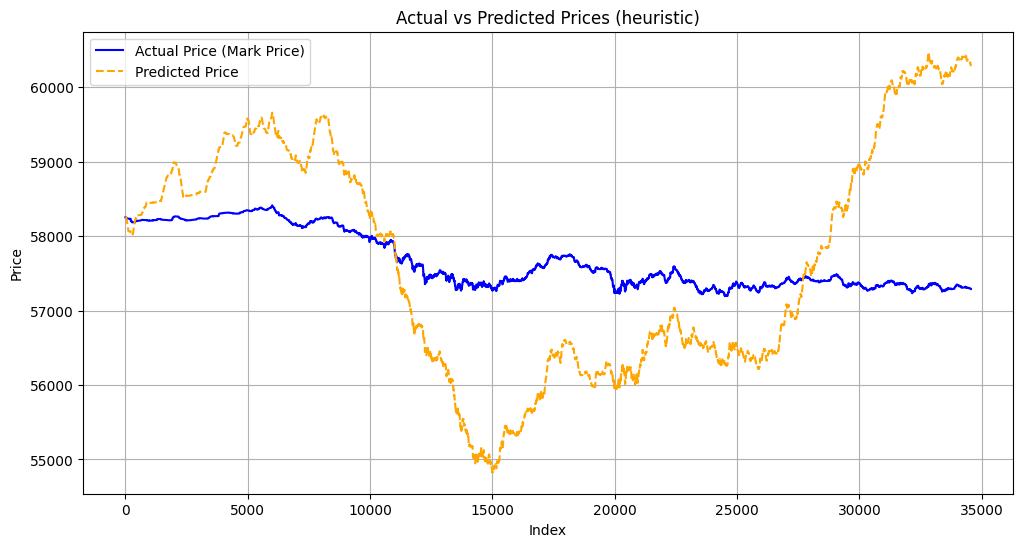

In [11]:
# Visualize the actual vs. predicted price along with signals
plt.figure(figsize=(12, 6))
plt.plot(Evaluate_result["mark_price"], label="Actual Price (Mark Price)", color="blue")
plt.plot(Evaluate_result["predicted_heuristic"], label="Predicted Price", color="orange", linestyle="--")
plt.title("Actual vs Predicted Prices (heuristic)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


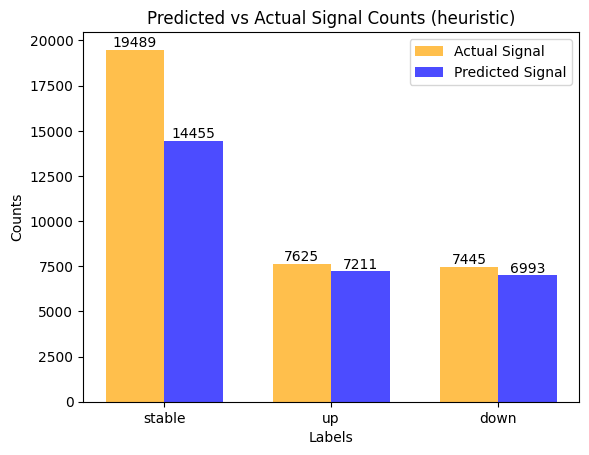

In [22]:
# Add signal distribution visualization
direction_mapping = {1: "up", 0: "stable", -1: "down"}
Evaluate_result["predicted_movement_heuristic"] = Evaluate_result["predicted_direction_heuristic"].map(direction_mapping)
Predict_signal_counts = Evaluate_result["predicted_movement_heuristic"].value_counts()
Actual_signal_counts = Evaluate_result["Price Movement"].value_counts()

labels = Predict_signal_counts.index.tolist()
heuristic_predict_values = Predict_signal_counts.values.tolist()
actual_values = Actual_signal_counts.values.tolist()

# Setting the positions and width for the bars
positions = np.arange(len(labels))
bar_width = 0.35

# Create the bar plot
bar1=plt.bar(positions , actual_values, bar_width, label='Actual Signal', color='orange', alpha=0.7)
bar2=plt.bar(positions+ bar_width, heuristic_predict_values, bar_width, label='Predicted Signal', color='b', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Predicted vs Actual Signal Counts (heuristic)')
plt.xticks(positions + bar_width / 2, labels)
plt.legend()

# Displaying the values on top of each bar
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')


plt.show()